In [39]:
import numpy as np
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow import random
from keras.layers import Dense

In [2]:
classifier = VGG16()

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 143s 0us/step


In [27]:
from keras.applications.vgg16 import decode_predictions
def predict_image(img):
    new_image= image.load_img(img, target_size=(224, 224))
    transformed_image = image.img_to_array(new_image)
    transformed_image = np.expand_dims(transformed_image, axis=0)
    transformed_image = preprocess_input(transformed_image)
    y_pred = classifier.predict(transformed_image)
    label = decode_predictions(y_pred,top=5)
    decoded_label = label[0][0]
    print('%s (%.2f%%)' % (decoded_label[1], decoded_label[2]*100 ))
    return new_image

pizza (97.68%)


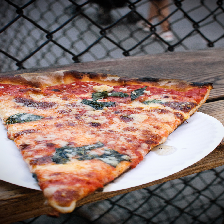

In [29]:
predict_image('./Data/Prediction/pizza.jpg')

moped (84.33%)


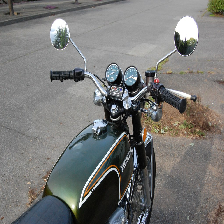

In [30]:
predict_image('./Data/Prediction/test_image_1.jpg')

walking_stick (30.52%)


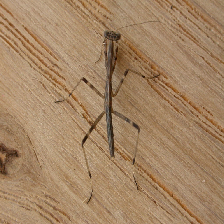

In [31]:
predict_image('./Data/Prediction/stick_insect.jpg')

In [34]:
vgg_model = keras.applications.vgg16.VGG16()
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [37]:
last_layer = str(vgg_model.layers[-1])
np.random.seed(42)
random.set_random_seed(42)
classifier= keras.Sequential()
for layer in vgg_model.layers:
    if str(layer) != last_layer:
        classifier.add(layer)
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [41]:
for layer in classifier.layers:
    layer.trainable=False
classifier.add(Dense(1, activation='sigmoid'))
classifier.summary()
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [48]:
from keras.preprocessing.image import ImageDataGenerator
generate_train_data = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
generate_test_data = ImageDataGenerator(rescale =1./255)
training_dataset = generate_train_data.flow_from_directory('./data/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_datasetset = generate_test_data.flow_from_directory('./data/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')
classifier.fit_generator(training_dataset,
                         steps_per_epoch = 2,
                         epochs = 1,
                         validation_data = test_datasetset,
                         validation_steps = 5,
                         shuffle=False)

Found 10764 images belonging to 2 classes.
Found 2674 images belonging to 2 classes.
Epoch 1/1
2/2 [==============================] - 78s 39s/step - loss: 0.6733 - accuracy: 0.6562 - val_loss: 0.6922 - val_accuracy: 0.5063


In [50]:
from keras.preprocessing import image
new_image = image.load_img('./data/Prediction/test_image_2.jpg', target_size = (224, 224))
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis = 0)
result = classifier.predict(new_image)
training_dataset.class_indices
if result[0][0] == 1:
    prediction = 'It is a flower'
else:
    prediction = 'It is a car'
print(prediction)

It is a car
